In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart (2).csv')

# checking null values

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


there are no null values

# Finding outliers

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:ylabel='chol'>

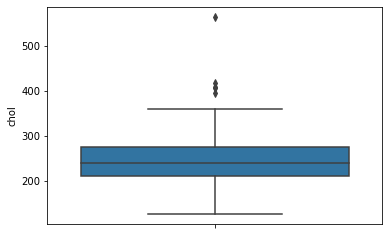

In [6]:
sns.boxplot(y='chol',data=df)

chol column has upper outlier value, correcting upper outliers

In [7]:
uv = np.percentile(df.chol,[99])[0]
df[(df.chol>uv)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [8]:
df.chol[(df.chol>3*uv)]=3*uv
df[(df.chol>uv)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


<AxesSubplot:ylabel='thalachh'>

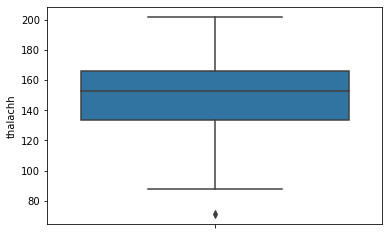

In [9]:
sns.boxplot(y='thalachh',data=df)

column 'thalachh' has lower outlier , correcting outliers

In [10]:
lv=np.percentile(df.thalachh,[1])[0]
df[df.thalachh<lv]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [11]:
df.thalachh[(df.thalachh<0.3*lv)]=0.3*lv
df[df.thalachh<lv]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


<AxesSubplot:ylabel='oldpeak'>

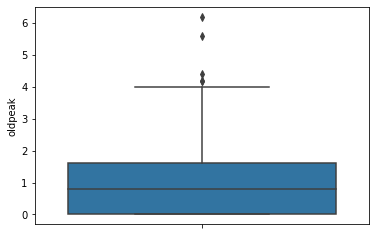

In [12]:
sns.boxplot(y='oldpeak',data=df)

colummn 'oldpeak' has upper outliers correcting outliers

In [13]:
uv = np.percentile(df.oldpeak,[99])[0]
df[(df.oldpeak>uv)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [14]:
df.oldpeak[(df.oldpeak>3*uv)]=3*uv
df[(df.oldpeak>uv)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


<AxesSubplot:ylabel='caa'>

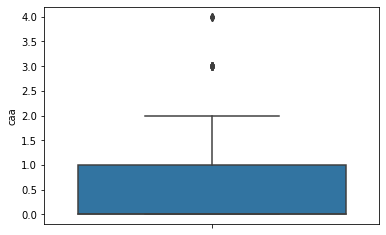

In [15]:
sns.boxplot(y='caa',data=df)

column 'caa' has upper outliers

In [16]:
uv = np.percentile(df.caa,[99])[0]
df[(df.caa>uv)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [17]:
df.caa[(df.caa>3*uv)]=3*uv
df[(df.caa>uv)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


<AxesSubplot:ylabel='thall'>

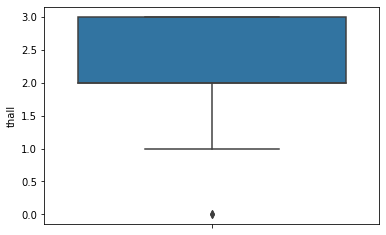

In [18]:
sns.boxplot(y='thall',data=df)

column 'thall' has lower outlier

In [19]:
lv=np.percentile(df.thall,[1])[0]
df[df.thall<lv]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [20]:
df.thall[(df.thall<0.3*lv)]=0.3*lv
df[df.thall<lv]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0.3,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0.3,0


<AxesSubplot:>

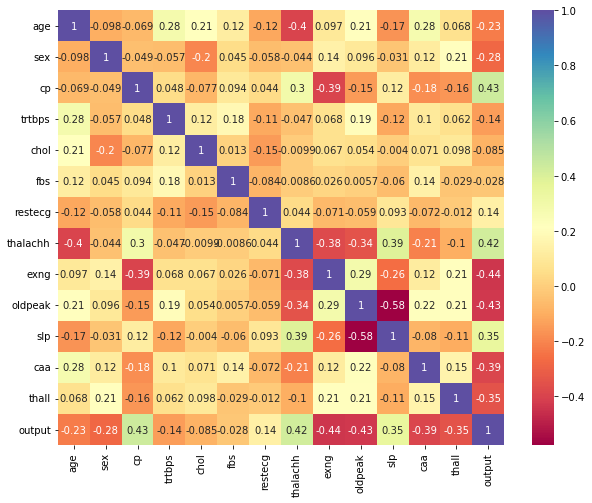

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Spectral')

From above plot highly correlated features are exng,oldpeak,thalachh,cp,caa,slp and thall.

In [22]:
# splitting data
x = df.drop(['output'],axis=1)
y = df['output']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

In [24]:
sc = StandardScaler()

scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# K neighbors

In [25]:
knn = KNeighborsClassifier(n_neighbors=6)

In [32]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=6)

In [40]:
y_pred_knn = knn.predict(x_test_scaled)

In [41]:
knn_acc = accuracy_score(y_test,y_pred)

In [42]:
confusion_matrix(y_test,y_pred_knn)

array([[40,  5],
       [10, 36]], dtype=int64)

In [43]:
print('Precision : %.3f'% precision_score(y_test,y_pred_knn, average='micro'))
print('Recall : %.3f'% recall_score(y_test,y_pred_knn,average='micro'))

Precision : 0.835
Recall : 0.835


# Decision tree

In [44]:
dec = DecisionTreeClassifier()

In [45]:
dec.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [46]:
y_pred_dec = knn.predict(x_test_scaled)

In [47]:
dec_acc = accuracy_score(y_test,y_pred_dec)

In [49]:
confusion_matrix(y_test,y_pred_dec)

array([[40,  5],
       [10, 36]], dtype=int64)

In [50]:
print('Precision : %.3f'% precision_score(y_test,y_pred_dec, average='micro'))
print('Recall : %.3f'% recall_score(y_test,y_pred_dec,average='micro'))

Precision : 0.835
Recall : 0.835
